Based on the article [How to score 0.8134 in Titanic Kaggle Challenge](http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html) by Ahmed Besbes and his Jupyter Notebook at https://github.com/ahmedbesbes/post1/blob/master/titanic-article.ipynb

In [148]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

# Import frequently used libraries
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

pd.options.display.max_rows = 100

In [149]:
# Read training data
data = pd.read_csv('../../input/train.csv')

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [151]:
data['Age'].fillna(data['Age'].median(), inplace=True)
#data['Embarked'].fillna('U', inplace=True)

# Survived vs. Dead
based on gender

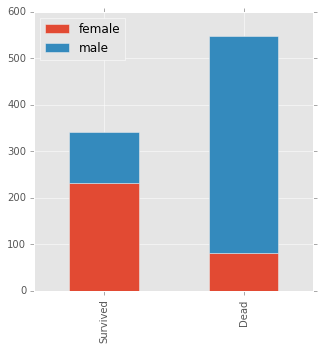

In [152]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(5,5))

# Male vs. Female

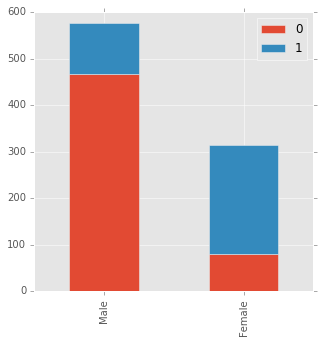

In [153]:
male = data[data['Sex']=='male']['Survived'].value_counts()
female = data[data['Sex']=='female']['Survived'].value_counts()
df = pd.DataFrame([male,female])
df.index = ['Male','Female']
df.plot(kind='bar',stacked=True, figsize=(5,5))

# Age factor

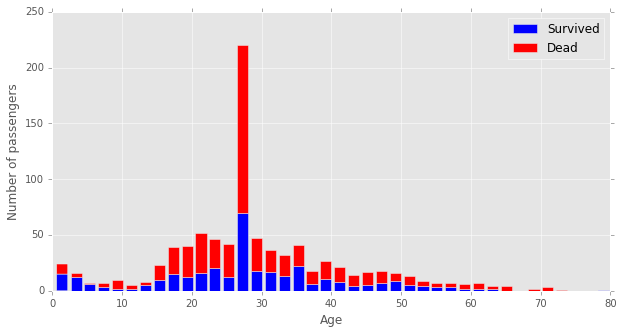

In [154]:
# Full Spectrum
figure = plt.figure(figsize=(10,5))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], stacked=True, color = ['b','r'],
         bins = 40,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

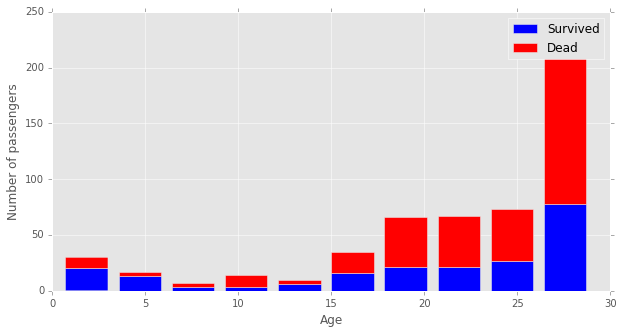

In [155]:
# Those of which Age < 30
figure = plt.figure(figsize=(10,5))
data30 = data[data['Age']<30]
plt.hist([data30[data30['Survived']==1]['Age'],data30[data30['Survived']==0]['Age']], stacked=True, color = ['b','r'],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

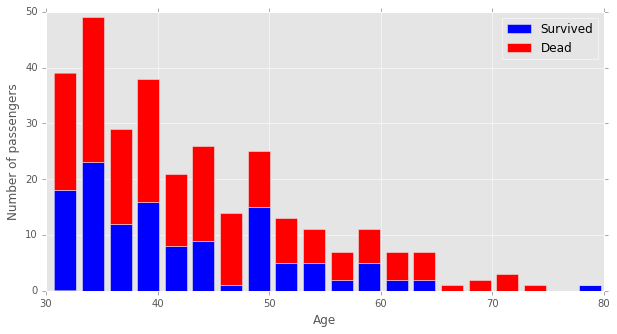

In [156]:
# Those of which Age > 30
figure = plt.figure(figsize=(10,5))
data30 = data[data['Age']>30]
plt.hist([data30[data30['Survived']==1]['Age'],data30[data30['Survived']==0]['Age']], stacked=True, color = ['b','r'],
         bins = 20,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

# Fare

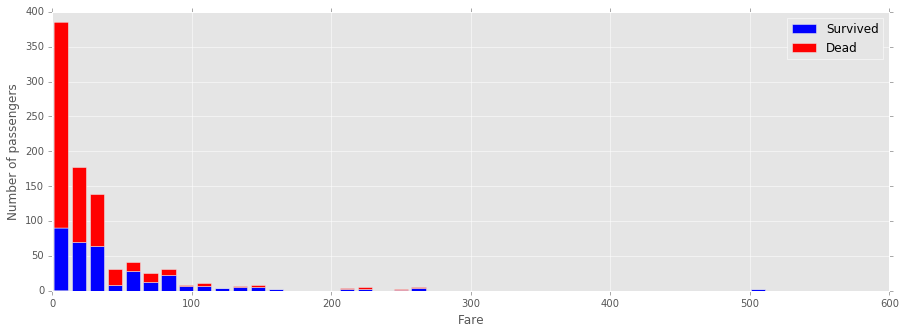

In [157]:
# Full spectrum
figure = plt.figure(figsize=(15,5))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], stacked=True, color = ['b','r'],
         bins = 40,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

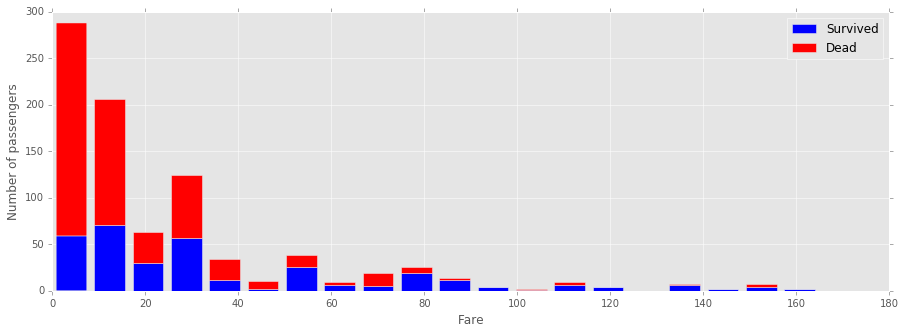

In [158]:
# Those of which Fare < 200
figure = plt.figure(figsize=(15,5))
data200 = data[data['Fare']<200]
plt.hist([data200[data200['Survived']==1]['Fare'],data200[data200['Survived']==0]['Fare']], stacked=True, color = ['b','r'],
         bins = 20,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

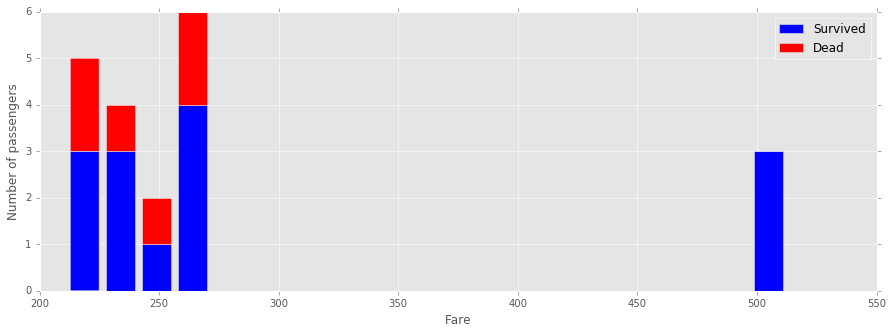

In [159]:
# Those of which Fare > 200
figure = plt.figure(figsize=(15,5))
data200 = data[data['Fare']>200]
plt.hist([data200[data200['Survived']==1]['Fare'],data200[data200['Survived']==0]['Fare']], stacked=True, color = ['b','r'],
         bins = 20,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

# Age vs. Fare

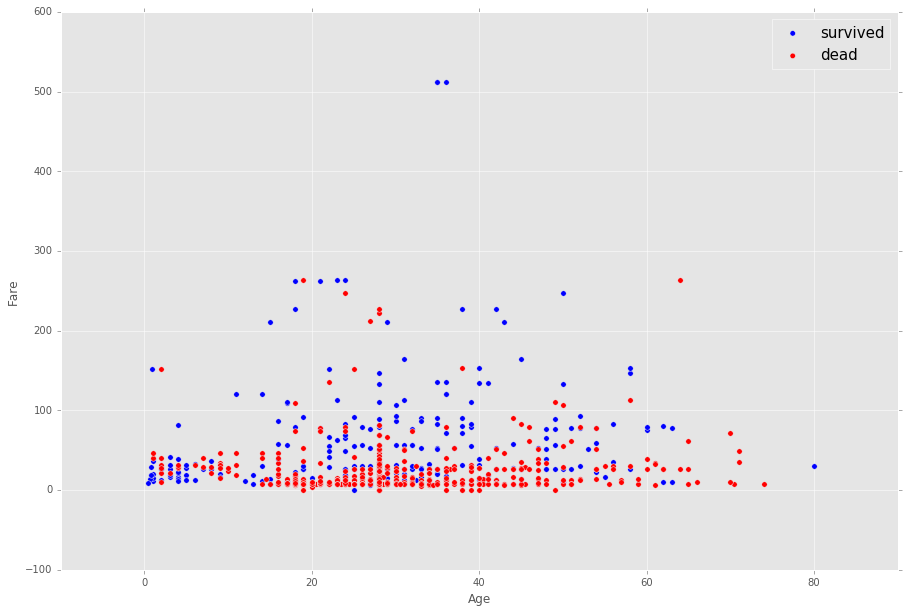

In [160]:
# Full spectrum
plt.figure(figsize=(15,10))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='b',s=30)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='r',s=30)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

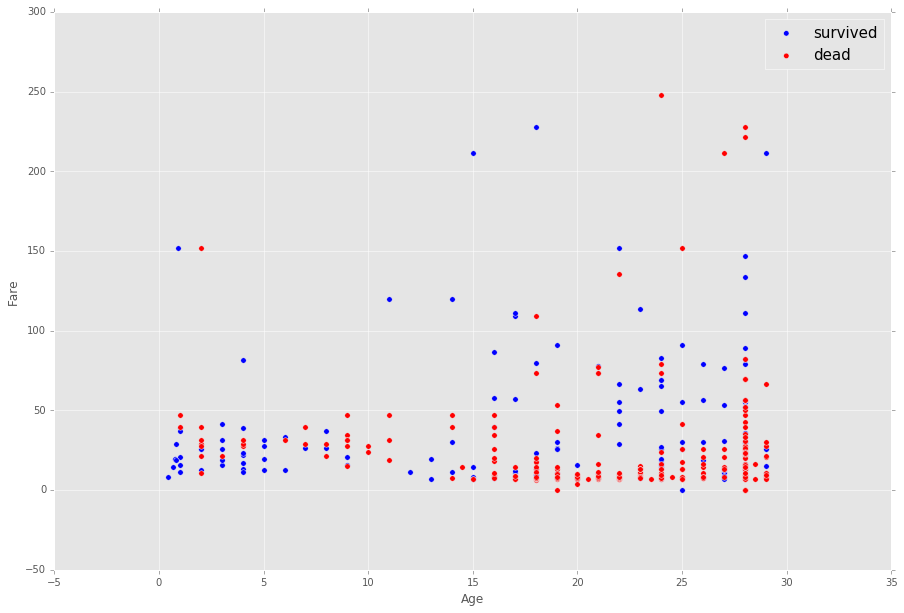

In [161]:
# Age < 30
plt.figure(figsize=(15,10))
ax = plt.subplot()
data30 = data[data['Age']<30]
data30 = data30[data30['Fare']<250]
ax.scatter(data30[data30['Survived']==1]['Age'],data30[data30['Survived']==1]['Fare'],c='b',s=30)
ax.scatter(data30[data30['Survived']==0]['Age'],data30[data30['Survived']==0]['Fare'],c='r',s=30)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

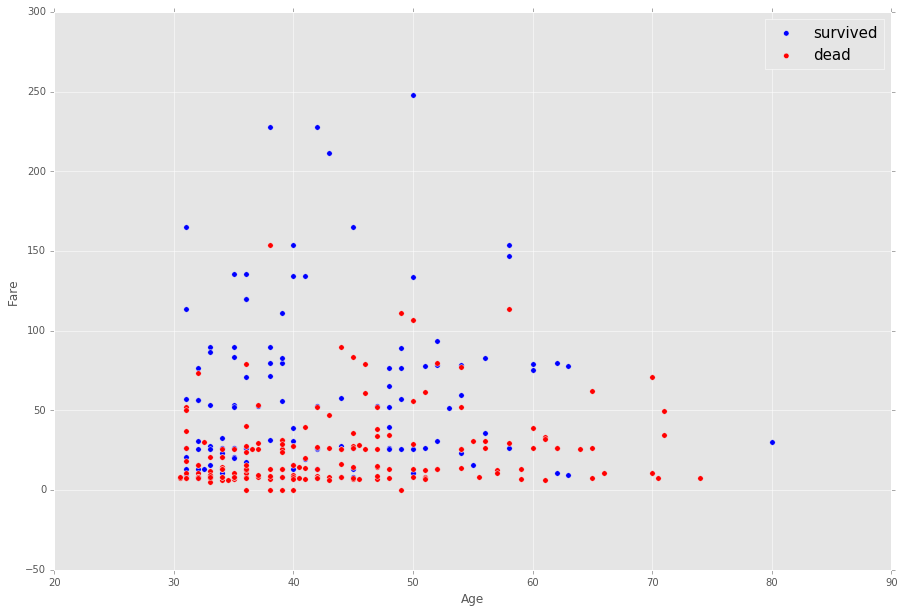

In [162]:
# Age > 30
plt.figure(figsize=(15,10))
ax = plt.subplot()
data30 = data[data['Age']>30]
data30 = data30[data30['Fare']<250]
ax.scatter(data30[data30['Survived']==1]['Age'],data30[data30['Survived']==1]['Fare'],c='b',s=30)
ax.scatter(data30[data30['Survived']==0]['Age'],data30[data30['Survived']==0]['Fare'],c='r',s=30)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

# Average Fare per Class

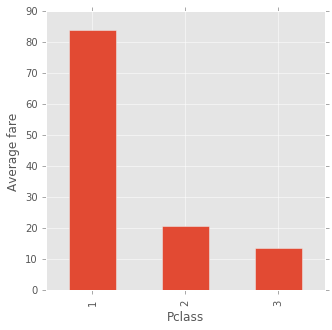

In [163]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(5,5), ax = ax)

# Embarked

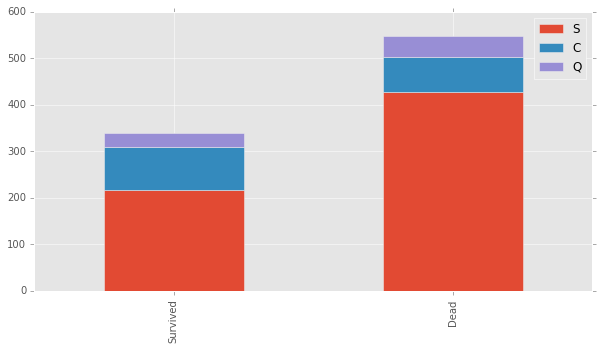

In [164]:
survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

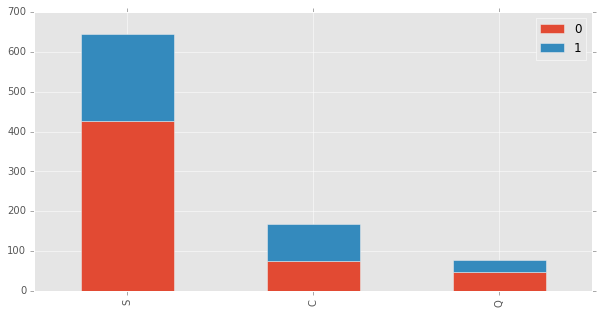

In [165]:
S_embark = data[data['Embarked']=='S']['Survived'].value_counts()
C_embark = data[data['Embarked']=='C']['Survived'].value_counts()
Q_embark = data[data['Embarked']=='Q']['Survived'].value_counts()
df = pd.DataFrame([S_embark, C_embark, Q_embark])
df.index = ['S', 'C', 'Q']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [166]:
def get_titles():

    global data
    
    # we extract the title from each name
    data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    data['Title'] = data.Title.map(Title_Dictionary)

get_titles()

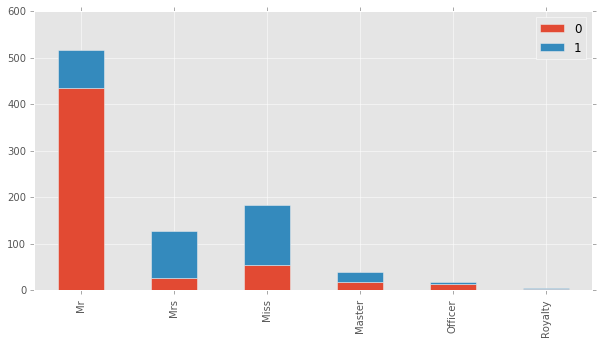

In [168]:
t_officer = data[data['Title']=='Officer']['Survived'].value_counts()
t_royalty = data[data['Title']=='Royalty']['Survived'].value_counts()
t_miss = data[data['Title']=='Miss']['Survived'].value_counts()
t_mrs = data[data['Title']=='Mrs']['Survived'].value_counts()
t_mr = data[data['Title']=='Mr']['Survived'].value_counts()
t_master = data[data['Title']=='Master']['Survived'].value_counts()

df = pd.DataFrame([t_mr, t_mrs, t_miss, t_master, t_officer, t_royalty])
df.index = ['Mr', 'Mrs', 'Miss', 'Master', 'Officer', 'Royalty']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [169]:
grouped = data.drop(['PassengerId','Survived'], axis=1).groupby(['Sex','Pclass','Title'])
grouped.median()

                        Age  SibSp  Parch       Fare
Sex    Pclass Title                                 
female 1      Miss     29.5    0.0    0.0   88.25000
              Mrs      38.0    1.0    0.0   79.20000
              Officer  49.0    0.0    0.0   25.92920
              Royalty  40.5    0.5    0.0   63.05000
       2      Miss     24.0    0.0    0.0   13.00000
              Mrs      31.5    1.0    0.0   26.00000
       3      Miss     22.0    0.0    0.0    8.75625
              Mrs      29.0    1.0    1.0   15.97500
male   1      Master    4.0    1.0    2.0  120.00000
              Mr       36.0    0.0    0.0   42.40000
              Officer  50.0    0.0    0.0   35.50000
              Royalty  40.0    0.0    0.0   27.72080
       2      Master    1.0    1.0    1.0   26.00000
              Mr       30.0    0.0    0.0   13.00000
              Officer  46.5    0.0    0.0   13.00000
       3      Master    6.5    3.5    1.0   28.51250
              Mr       28.0    0.0    0.0    7

In [170]:
def process_names():
    
    global data
    # we clean the Name variable
    data.drop('Name',axis=1,inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(data['Title'],prefix='Title')
    data = pd.concat([data,titles_dummies],axis=1)
    
    # removing the title variable
    data.drop('Title',axis=1,inplace=True)
    
process_names()

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         889 non-null object
Title_Master     891 non-null float64
Title_Miss       891 non-null float64
Title_Mr         891 non-null float64
Title_Mrs        891 non-null float64
Title_Officer    891 non-null float64
Title_Royalty    891 non-null float64
dtypes: float64(8), int64(5), object(4)
memory usage: 118.4+ KB


In [180]:
data["Relatives"] = data['SibSp'] + data['Parch']

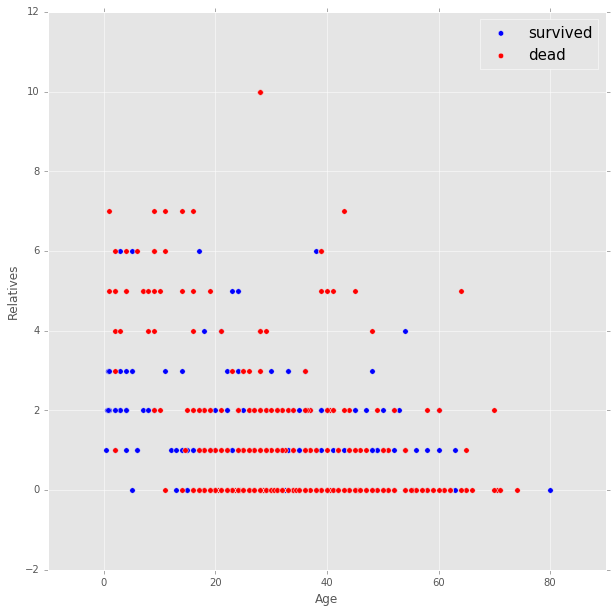

In [182]:
# Full spectrum
plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Relatives'],c='b',s=30)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Relatives'],c='r',s=30)
ax.set_xlabel('Age')
ax.set_ylabel('Relatives')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

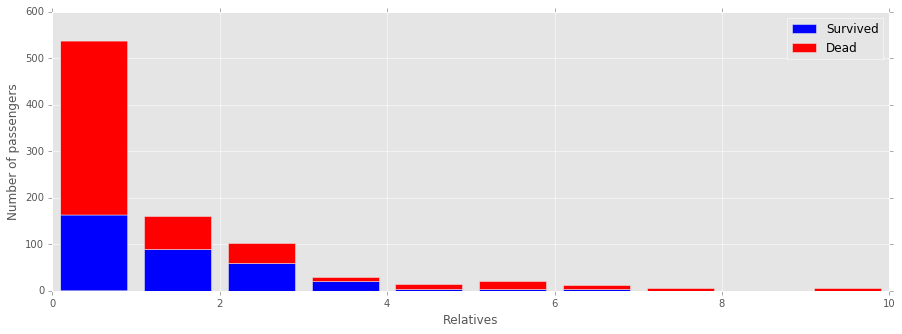

In [183]:
figure = plt.figure(figsize=(15,5))
plt.hist([data[data['Survived']==1]['Relatives'],data[data['Survived']==0]['Relatives']], stacked=True, color = ['b','r'],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Relatives')
plt.ylabel('Number of passengers')
plt.legend()

In [185]:
def process_cabin():
    
    global data
    
    # replacing missing cabins with U (for Uknown)
    data.Cabin.fillna('U',inplace=True)
    
    # mapping each Cabin value with the cabin letter
    data['Cabin'] = data['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(data['Cabin'],prefix='Cabin')
    
    data = pd.concat([data,cabin_dummies],axis=1)
    
#    data.drop('Cabin',axis=1,inplace=True)

process_cabin()

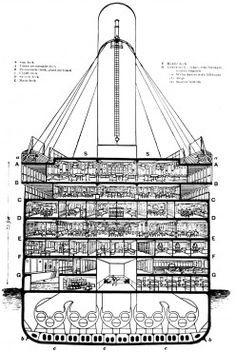

In [195]:
from IPython.display import Image
Image("https://s-media-cache-ak0.pinimg.com/236x/34/62/24/346224a898987532c55974ab1e54a732.jpg",height=300,width=300)


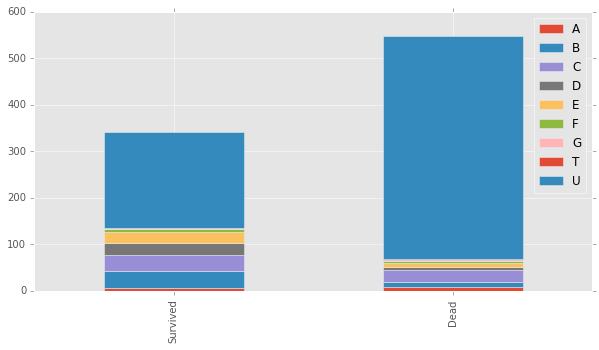

In [196]:
survived_cabin = data[data['Survived']==1]['Cabin'].value_counts()
dead_cabin = data[data['Survived']==0]['Cabin'].value_counts()
df = pd.DataFrame([survived_cabin,dead_cabin])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

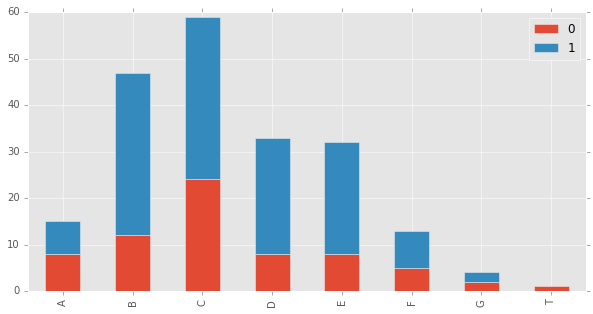

In [197]:
A_cabin = data[data['Cabin']=='A']['Survived'].value_counts()
B_cabin = data[data['Cabin']=='B']['Survived'].value_counts()
C_cabin = data[data['Cabin']=='C']['Survived'].value_counts()
D_cabin = data[data['Cabin']=='D']['Survived'].value_counts()
E_cabin = data[data['Cabin']=='E']['Survived'].value_counts()
F_cabin = data[data['Cabin']=='F']['Survived'].value_counts()
G_cabin = data[data['Cabin']=='G']['Survived'].value_counts()
T_cabin = data[data['Cabin']=='T']['Survived'].value_counts()

df = pd.DataFrame([A_cabin, B_cabin, C_cabin, D_cabin, E_cabin, F_cabin, G_cabin, T_cabin])
df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
df.plot(kind='bar',stacked=True, figsize=(10,5))

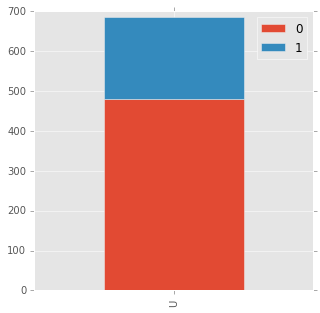

In [198]:
U_cabin = data[data['Cabin']=='U']['Survived'].value_counts()
df = pd.DataFrame([U_cabin])
df.index = ['U']
df.plot(kind='bar',stacked=True, figsize=(5,5))
